<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-12 13:49:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.8MB/s    in 3.1s    

2025-06-12 13:49:55 (64.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [28]:
!pip install pandas
!pip install seaborn

In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 122.3 MB/s eta 0:00:00


In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [31]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [32]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [33]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

**Demo 3: Group data by age**


In [34]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


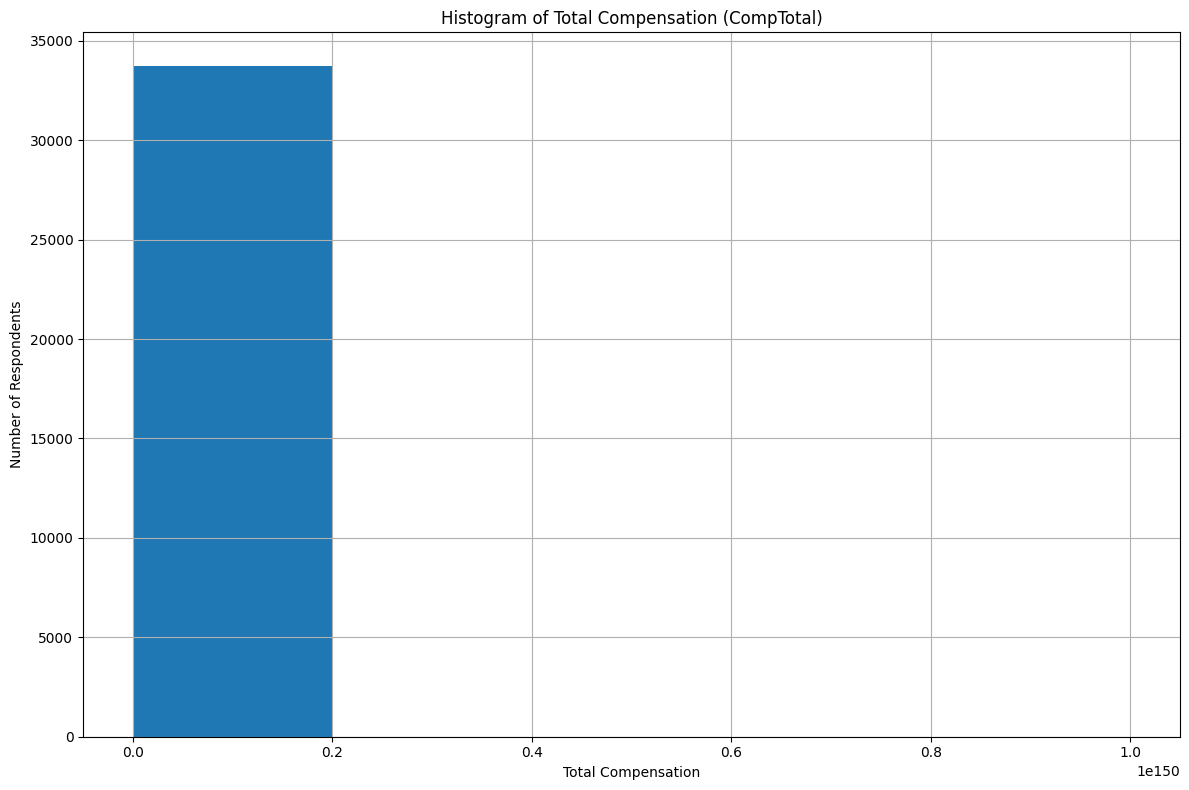

In [35]:
## Write your code here

QUERY = """SELECT CompTotal FROM main"""
df = pd.read_sql_query(QUERY, conn)

#Lets drop NaN in CompTotal
df.dropna(inplace=True)

#Plot a histogram of CompTotal
plt.figure(figsize=(12,8))
plt.hist(df, bins=5)
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


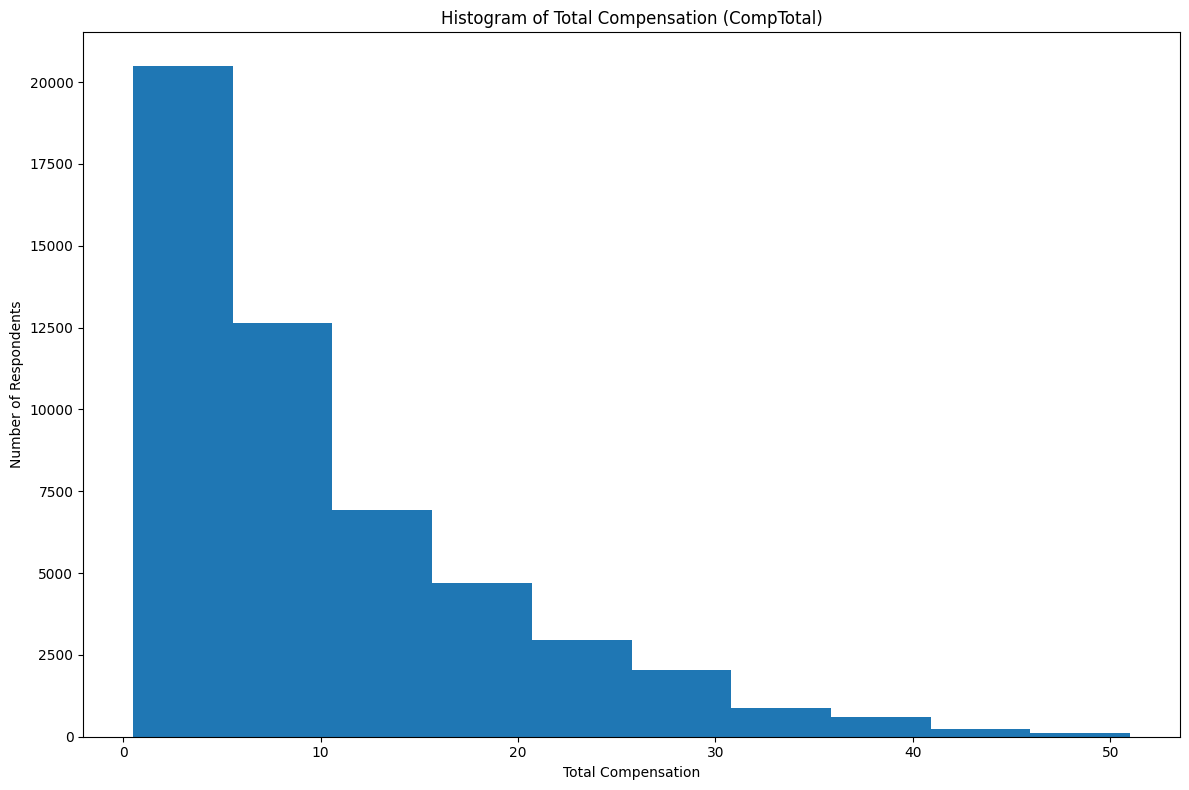

In [36]:
## Write your code here

QUERY = """SELECT YearsCodePro FROM main"""
df = pd.read_sql_query(QUERY, conn)

# Replace special text values like 'Less than 1 year' and 'More than 50 years'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert to numeric (some may still be strings)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#Lets drop NaN in YearsCodePro
df.dropna(inplace=True)

#Plot a histogram of YearsCodePro
plt.figure(figsize=(12,8))
plt.hist(df, bins=10)
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
#plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_298/885580451.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({


<Figure size 1200x600 with 0 Axes>

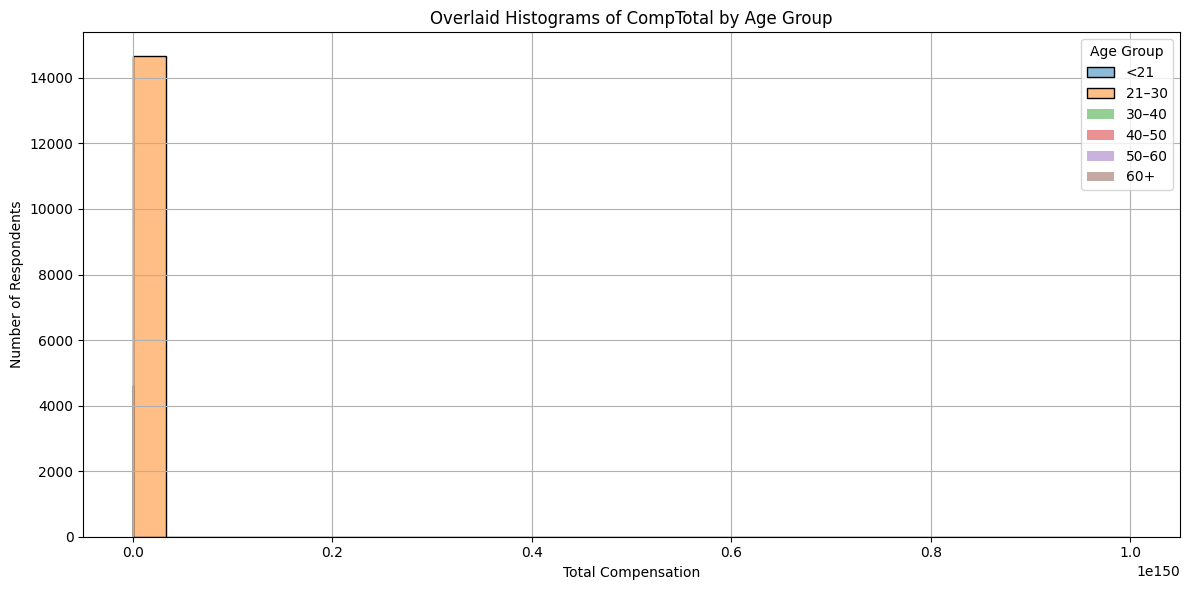

In [37]:
## Write your code here

# Load data
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

#Clean data
df = df[df['CompTotal'].notna() & df['Age'].notna()]

#  Replace text-based categories with approximate numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

#Convert to numeric (if some values are still strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

bins = [17, 21, 30, 40, 50, 60, 70]
labels = ['<21', '21–30', '30–40', '40–50', '50–60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 4: Plot overlaid histograms
plt.figure(figsize=(12, 6))
age_groups = df['AgeGroup'].dropna().unique()

# Use histograms to compare the distribution of CompTotal across different Age groups
plt.figure(figsize=(12, 6))
age_groups = df['AgeGroup'].dropna().unique()
for age in age_groups:
    sns.histplot(df[df['AgeGroup'] == age]['CompTotal'],
                 label=str(age), bins=30, kde=False, alpha=0.5)
plt.title('Overlaid Histograms of CompTotal by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_298/4160467866.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({


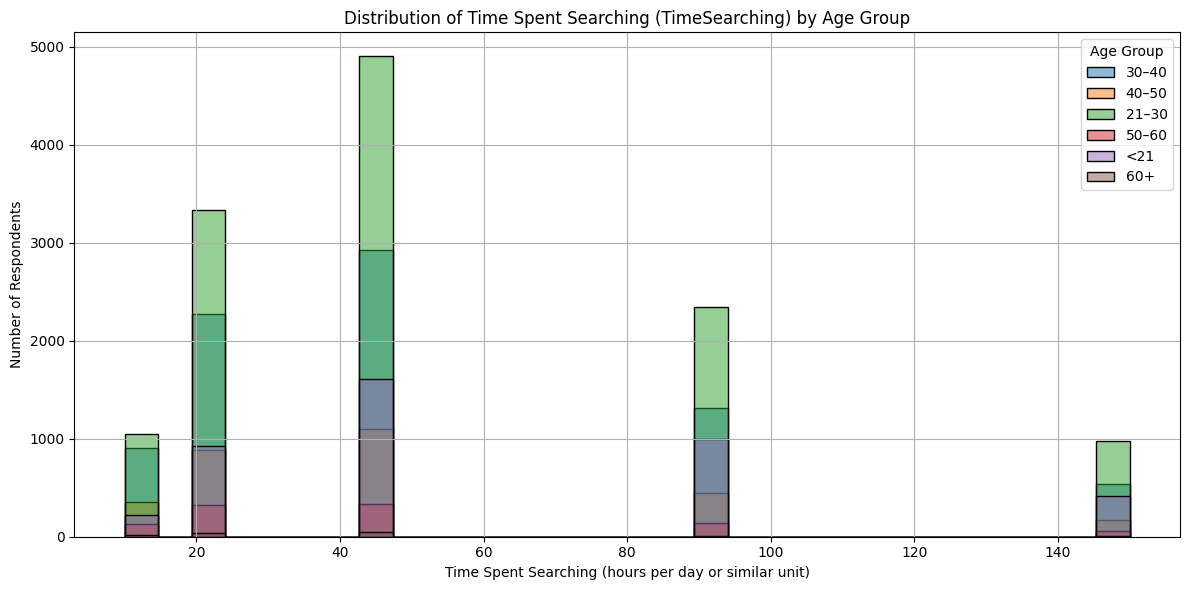

In [45]:
## Write your code here
# Load data
QUERY = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(QUERY, conn)

#Clean data
df = df[df['TimeSearching'].notna() & df['Age'].notna()]

#  Replace text-based categories with approximate numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

# Map categorical time ranges to approximate minutes
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearchingMinutes'] = df['TimeSearching'].map(time_map)
#Convert to numeric (if some values are still strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

bins = [17, 21, 30, 40, 50, 60, 70]
labels = ['<21', '21–30', '30–40', '40–50', '50–60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
for group in df['AgeGroup'].unique():
    sns.histplot(
        df[df['AgeGroup'] == group]['TimeSearchingMinutes'],
        label=group,
        bins=30,
        kde=False,
        alpha=0.5
    )
plt.title('Distribution of Time Spent Searching (TimeSearching) by Age Group')
plt.xlabel('Time Spent Searching (hours per day or similar unit)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


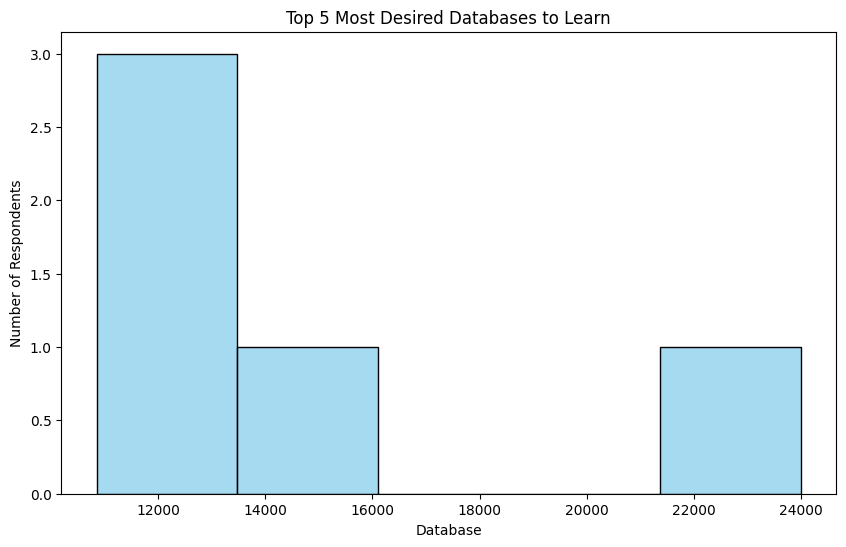

In [64]:
## Write your code here

QUERY = """SELECT DatabaseWantToWorkWith FROM main """
df = pd.read_sql_query(QUERY, conn)
df.dropna(inplace=True)
# Split comma-separated entries into individual rows
df_split = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Count occurrences
top5 = df_split.value_counts().head(5)
print(top5)
plt.figure(figsize=(10, 6))
sns.histplot(
    top5.values,
    bins=5,
    color='skyblue'
)
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


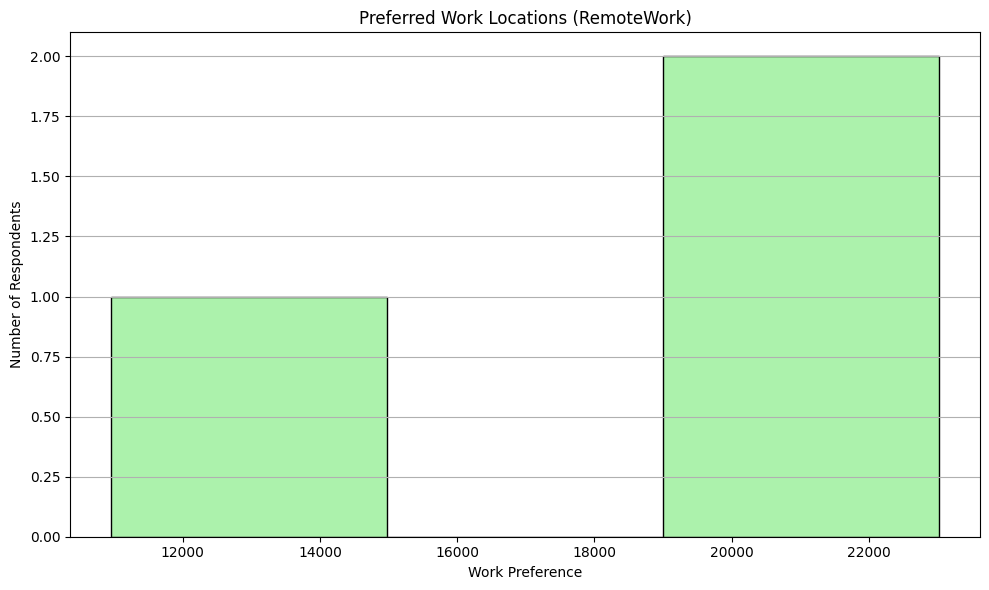

In [72]:
## Write your code here
QUERY = """SELECT RemoteWork FROM main """
df = pd.read_sql_query(QUERY,conn)

#Clean Data
df.dropna(inplace=True)

# Count frequencies of each work preference
work_counts = df['RemoteWork'].value_counts()
print(work_counts)
# Plot histogram-style bar chart
plt.figure(figsize=(10, 6))
sns.histplot(
    work_counts,
    bins=len(work_counts),
    color='lightgreen'
)

# Set x-axis labels manually to match work preferences
#plt.xticks(ticks=range(len(work_counts)), labels=work_counts.index, rotation=45)
plt.title('Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Preference')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


/tmp/ipykernel_298/546865473.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({


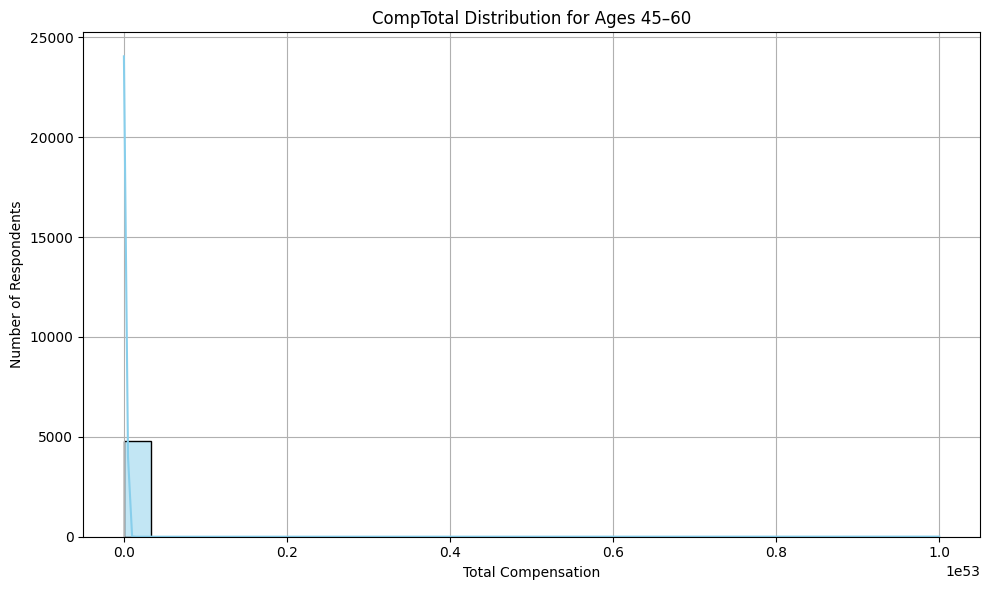

In [73]:
## Write your code here
QUERY = """SELECT Age, CompTotal FROM main """
df = pd.read_sql_query(QUERY, conn)

#  Replace text-based categories with approximate numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
})

# Filter for age range 45 to 60
df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Plot the histogram for CompTotal within the age group 45 to 60 
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'], bins=30, kde=True, color='skyblue')

plt.title('CompTotal Distribution for Ages 45–60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


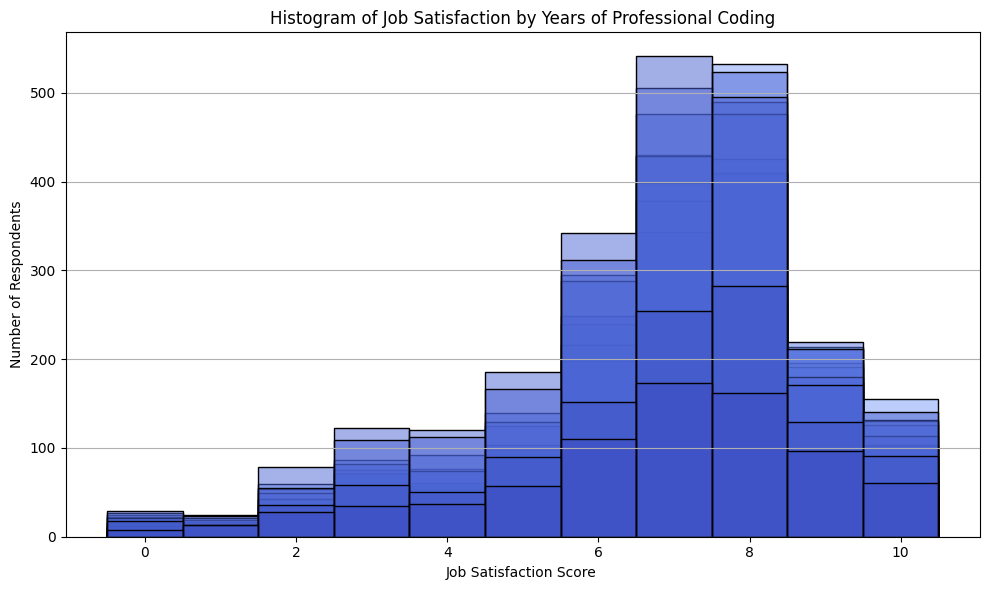

In [77]:
## Write your code here
QUERY = """ SELECT JobSat, YearsCodePro FROM main """
df = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#Clean data
df.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='JobSat',
    bins=5,
    kde=False,
    discrete=True,
    hue='YearsCodePro',
    palette='coolwarm',
    legend=False  # Optional: remove legend if too many hues
)

plt.title('Histogram of Job Satisfaction by Years of Professional Coding')
plt.xlabel('Job Satisfaction Score ')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
